# Reuters Multiclass Classification Example

## Prepare Dataset

In [1]:
# Import data
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)


# Vectorize  data
import numpy as np

def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)


# Vectorize labels with one-hot encoding
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


2113536/2110848 [==============================] - 0s 0us/step


## Build Model

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc'])

## Take Validation Set

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Train Model

In [16]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 3.0211 - acc: 0.4032 - val_loss: 1.6699 - val_acc: 0.6580
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4763 - acc: 0.7057 - val_loss: 1.2892 - val_acc: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0740 - acc: 0.7711 - val_loss: 1.1204 - val_acc: 0.7620
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8191 - acc: 0.8320 - val_loss: 1.0140 - val_acc: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6708 - acc: 0.8592 - val_loss: 0.9550 - val_acc: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5345 - acc: 0.8904 - val_loss: 0.9251 - val_acc: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4252 - acc: 0.9073 - val_loss: 0.8981 - val_acc: 0.8060
Epoch 8/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3102 - a

## Plot Loss

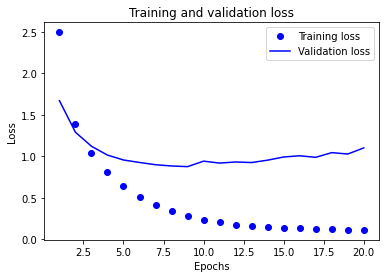

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plot Accuracy

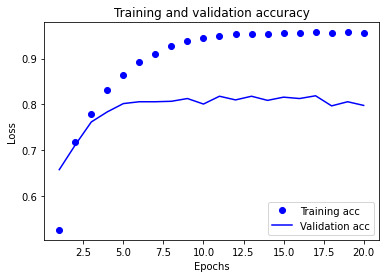

In [18]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()